In [34]:
import pandas as pd 
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from scipy.stats import skew, kurtosis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler



In [35]:
df= pd.read_csv("diabetes.csv")

In [36]:
# Loại bỏ dấu cách (replace " " bằng "_") → dễ dùng hơn
df.columns = df.columns.str.replace(' ', '_')


1. EXPLOYRATORY DATA ANALYSIS - EDA

In [37]:
#Show first 5 rows 
print(df.head())

   Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   Diabetes_Pedigree_Function  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  


In [38]:
#Show size of DataFrame 
print(df.shape)

(768, 9)


In [39]:
#Show datatype of each column 
print(df.dtypes)

Pregnancies                     int64
Glucose                         int64
Blood_Pressure                  int64
Skin_Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                             int64
Outcome                         int64
dtype: object


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [41]:
#Show descriptive statistics
print(df.describe())

       Pregnancies     Glucose  Blood_Pressure  Skin_Thickness     Insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.355807       15.952218  115.244002   
min       0.000000    0.000000        0.000000        0.000000    0.000000   
25%       1.000000   99.000000       62.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   30.500000   
75%       6.000000  140.250000       80.000000       32.000000  127.250000   
max      17.000000  199.000000      122.000000       99.000000  846.000000   

              BMI  Diabetes_Pedigree_Function         Age     Outcome  
count  768.000000                  768.000000  768.000000  768.000000  
mean    31.992578                    0.471876   33.240885    0.348958  
std      7.884160                    0.331329   11.760232    0.476951  
min      

In [42]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64


Descriptive Statistics

In [43]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
Blood_Pressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
Skin_Thickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
Diabetes_Pedigree_Function,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [44]:
# Descriptive statistics function
def descriptive_stats(dataframe):
    stats = pd.DataFrame(index=dataframe.columns)
    stats['Mean'] = dataframe.mean()
    stats['Median'] = dataframe.median()
    stats['Mode'] = dataframe.mode().iloc[0]
    stats['Std'] = dataframe.std()
    stats['Variance'] = dataframe.var()
    stats['Min'] = dataframe.min()
    stats['5%'] = dataframe.quantile(0.05)
    stats['25%'] = dataframe.quantile(0.25)
    stats['50%'] = dataframe.quantile(0.50)
    stats['75%'] = dataframe.quantile(0.75)
    stats['95%'] = dataframe.quantile(0.95)
    stats['Max'] = dataframe.max()
    stats['Range'] = stats['Max'] - stats['Min']
    stats['IQR'] = stats['75%'] - stats['25%']
    stats['Skewness'] = dataframe.apply(skew)
    stats['Kurtosis'] = dataframe.apply(kurtosis)
    return stats.round(2)

# Call function and display
stats_df = descriptive_stats(df)
# Rounding and formatting
styled_stats = stats_df.style\
    .background_gradient(cmap='Blues', axis=1)\
    .format("{:.2f}")\
    .set_caption("Descriptive statistics of attributes in the Diabetes dataset")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold')]
    }])

styled_stats


,Mean,Median,Mode,Std,Variance,Min,5%,25%,50%,75%,95%,Max,Range,IQR,Skewness,Kurtosis
Pregnancies,3.85,3.00,1.00,3.37,11.35,0.00,0.00,1.00,3.00,6.00,10.00,17.00,17.00,5.00,0.90,0.15
Glucose,120.89,117.00,99.00,31.97,1022.25,0.00,79.00,99.00,117.00,140.25,181.00,199.00,199.00,41.25,0.17,0.63
Blood_Pressure,69.11,72.00,70.00,19.36,374.65,0.00,38.70,62.00,72.00,80.00,90.00,122.00,122.00,18.00,-1.84,5.14
Skin_Thickness,20.54,23.00,0.00,15.95,254.47,0.00,0.00,0.00,23.00,32.00,44.00,99.00,99.00,32.00,0.11,-0.52
Insulin,79.80,30.50,0.00,115.24,13281.18,0.00,0.00,0.00,30.50,127.25,293.00,846.00,846.00,127.25,2.27,7.16
BMI,31.99,32.00,32.00,7.88,62.16,0.00,21.80,27.30,32.00,36.60,44.40,67.10,67.10,9.30,-0.43,3.26
Diabetes_Pedigree_Function,0.47,0.37,0.25,0.33,0.11,0.08,0.14,0.24,0.37,0.63,1.13,2.42,2.34,0.38,1.92,5.55
Age,33.24,29.00,22.00,11.76,138.30,21.00,21.00,24.00,29.00,41.00,58.00,81.00,60.00,17.00,1.13,0.63
Outcome,0.35,0.00,0.00,0.48,0.23,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.63,-1.60


In [45]:
#Transformation Skewness >1
df['Insulin_log'] = np.log1p(df['Insulin'])
df['DPF_log'] = np.log1p(df['Diabetes_Pedigree_Function'])
df['Age_log'] = np.log1p(df['Age'])


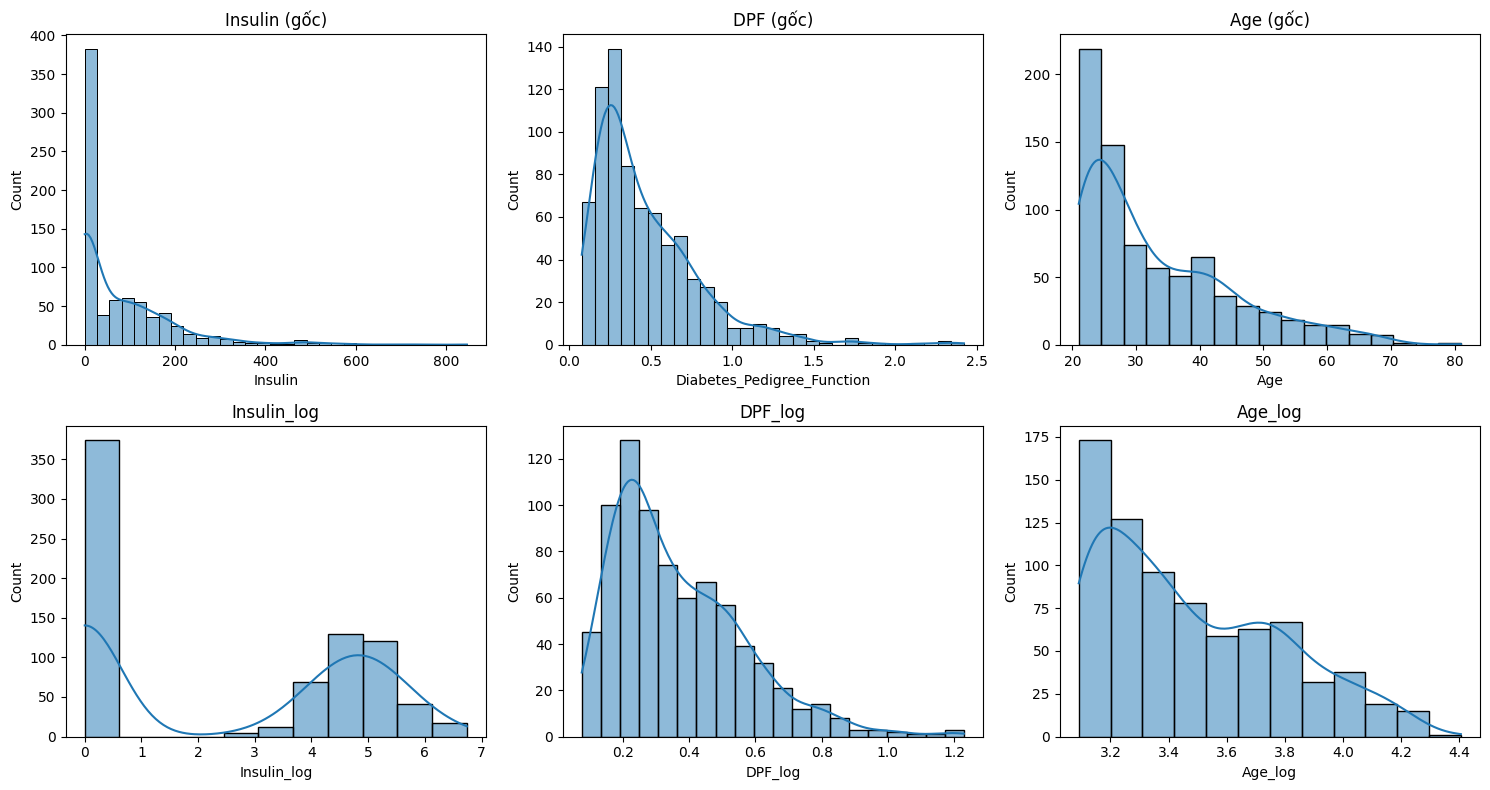

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(df['Insulin'], ax=axes[0, 0], kde=True).set_title("Insulin (gốc)")
sns.histplot(df['Diabetes_Pedigree_Function'], ax=axes[0, 1], kde=True).set_title("DPF (gốc)")
sns.histplot(df['Age'], ax=axes[0, 2], kde=True).set_title("Age (gốc)")

sns.histplot(df['Insulin_log'], ax=axes[1, 0], kde=True).set_title("Insulin_log")
sns.histplot(df['DPF_log'], ax=axes[1, 1], kde=True).set_title("DPF_log")
sns.histplot(df['Age_log'], ax=axes[1, 2], kde=True).set_title("Age_log")

plt.tight_layout()
plt.show()

In [49]:
#Phát hiện và phân tích missing value ẩn 
columns_to_check = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI','Diabetes_Pedigree_Function',
    'Age']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    percent = (zero_count / df.shape[0]) * 100
    print(f"{col:<20} | Số lượng = 0: {zero_count:<4} ({percent:.1f}%)")


Pregnancies          | Số lượng = 0: 111  (14.5%)
Glucose              | Số lượng = 0: 5    (0.7%)
Blood_Pressure       | Số lượng = 0: 35   (4.6%)
Skin_Thickness       | Số lượng = 0: 227  (29.6%)
Insulin              | Số lượng = 0: 374  (48.7%)
BMI                  | Số lượng = 0: 11   (1.4%)
Diabetes_Pedigree_Function | Số lượng = 0: 0    (0.0%)
Age                  | Số lượng = 0: 0    (0.0%)



*Review
Dữ liệu không chứa giá trị NaN rõ ràng, tuy nhiên một số feature lại có nhiều giá trị bằng `0` không hợp lý về mặt sinh học – đây được xem là **missing values ẩn** và cần được xử lý.

Dưới đây là thống kê số lượng các giá trị `0` theo từng cột:

| Feature                     | Số lượng = 0 | Tỉ lệ (%) | Hợp lý về mặt sinh học |
|-----------------------------|--------------|-----------|-------------------------|
| Pregnancies                 | 111          | 14.5%     |  Có thể (chưa từng mang thai) |
| Glucose                     | 5            | 0.7%      |  Không hợp lý (không thể có glucose = 0) |
| Blood Pressure              | 35           | 4.6%      |  Không hợp lý |
| Skin Thickness              | 227          | 29.6%     |  Không hợp lý (độ dày của da không thể =0) |
| Insulin                     | 374          | 48.7%     |  Không hợp lý (nồng độ insulin không thể = 0) |
| BMI                         | 11           | 1.4%      |  Không hợp lý (BMI không thể bằng 0) |
| Diabetes Pedigree Function  | 0            | 0.0%      |  Hợp lý |
| Age                         | 0            | 0.0%      |  Hợp lý |

> **Kết luận**: Có tới ~85% bản ghi có ít nhất một giá trị "0" không hợp lý. Các giá trị này sẽ được xử lý tại **Bước 2.1** bằng phương pháp **median imputation theo lớp `Outcome`**.


In [50]:
#Phân tích Target Variable
# Đếm số lượng từng lớp
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)  # Tỉ lệ %


Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


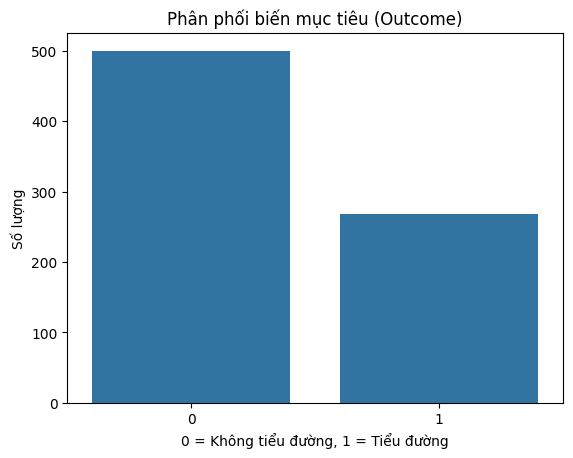

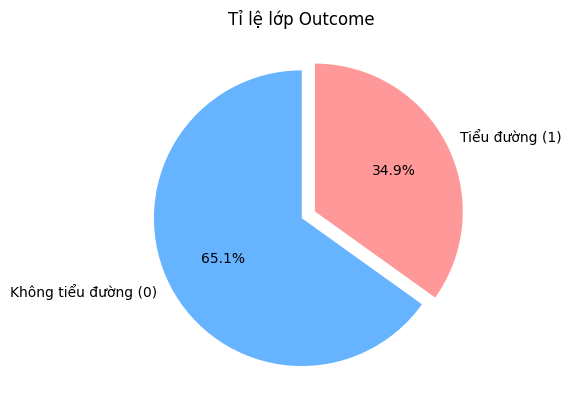

In [51]:

# Biểu đồ đếm
sns.countplot(data=df, x='Outcome')
plt.title("Phân phối biến mục tiêu (Outcome)")
plt.xlabel("0 = Không tiểu đường, 1 = Tiểu đường")
plt.ylabel("Số lượng")
plt.show()

# Biểu đồ hình tròn (pie chart)
df['Outcome'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Không tiểu đường (0)', 'Tiểu đường (1)'],
    colors=['#66b3ff','#ff9999'],
    explode=(0, 0.1)
)
plt.ylabel('')
plt.title("Tỉ lệ lớp Outcome")
plt.show()


Review :
Biến `Outcome` là biến mục tiêu phân loại nhị phân:
- `0`: Không bị tiểu đường
- `1`: Bị tiểu đường

| Lớp | Số lượng | Tỉ lệ (%) |
|-----|----------|-----------|
| 0   | 500      | 65.1%     |
| 1   | 268      | 34.9%     |

**Nhận xét:**
- Dữ liệu có **mất cân bằng lớp vừa phải** (65:35)
- Mô hình có thể bị lệch nếu không xử lý phù hợp
- Cần lưu ý:
  - Sử dụng `stratify` khi chia train/test
  - Ưu tiên dùng **precision**, **recall**, **f1-score**, **AUC** để đánh giá thay vì chỉ `accuracy`
  - Có thể áp dụng thêm kỹ thuật như **SMOTE**, hoặc `class_weight='balanced'` nếu cần


In [ ]:
#Correlation Analysis
